In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('./Churn_Modelling.csv');
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
dataset.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [3]:
X = dataset.iloc[:, 3:13]
Y = dataset.iloc[:, 13]

In [4]:
X.shape

(10000, 10)

In [5]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Conversion of Categorical into binary values 0 or 1

In [6]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
X = pd.concat([X,geography,gender],axis = 1)

In [8]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [9]:
X = X.drop(['Geography','Gender'],axis=1)

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train.shape

(8000, 11)

In [15]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [16]:
Y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [18]:
classifier = Sequential()

In [19]:
classifier.add(Dense(units = 10, kernel_initializer = 'he_normal',activation = 'relu',input_dim = 11))
# classifier.add(Dropout(0.3))
classifier.add(Dense(units = 20,kernel_initializer ='he_normal',activation= 'relu'))
# classifier.add(Dropout(0.4))
classifier.add(Dense(units = 15,kernel_initializer = 'he_normal',activation='relu'))
# classifier.add(Dense(0.2))
classifier.add(Dense(units = 1 ,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [21]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size = 10,epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4936 - accuracy: 0.7975 - val_loss: 0.4641 - val_accuracy: 0.8005
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8072 - val_loss: 0.4299 - val_accuracy: 0.8133
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8220 - val_loss: 0.4125 - val_accuracy: 0.8205
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3875 - accuracy: 0.8356 - val_loss: 0.3998 - val_accuracy: 0.8258
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3735 - accuracy: 0.8414 - val_loss: 0.3945 - val_accuracy: 0.8345
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3627 - accuracy: 0.8485 - val_loss: 0.3828 - val_accuracy: 0.8451
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3520 - accuracy: 0.8509 - val_loss: 0.3755 - val_accuracy: 0.8421

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.8746 - val_loss: 0.3859 - val_accuracy: 0.8466
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.2961 - accuracy: 0.8733 - val_loss: 0.3872 - val_accuracy: 0.8413
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.2960 - accuracy: 0.8753 - val_loss: 0.3877 - val_accuracy: 0.8440
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.2944 - accuracy: 0.8763 - val_loss: 0.3907 - val_accuracy: 0.8429
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.2941 - accuracy: 0.8748 - val_loss: 0.3885 - val_accuracy: 0.8440
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.2945 - accuracy: 0.8761 - val_loss: 0.3868 - val_accuracy: 0.8474
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.2939 - accuracy: 0.8740 - val_loss: 0.3884 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


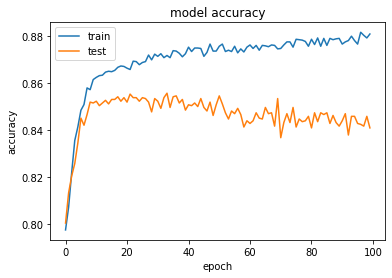

In [26]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

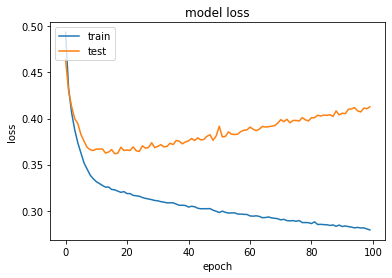

In [24]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [27]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)


0.8505

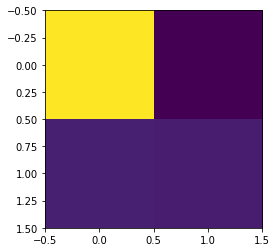

In [33]:
plt.imshow(cm)
score